In [107]:
import pandas as  pd 
data=pd.read_csv('dubai_properties.csv')
data.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

In [109]:
data.isna().sum()

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64

In [110]:
data.drop('Address',axis=1,inplace=True)

In [111]:
null_data=data[(data['Latitude'].isna())&(data['Longitude'].isna())]


In [112]:
nonnull_city=null_data.City.value_counts()

In [113]:
nonnull_data=data[(~data['Latitude'].isna())&(~data['Longitude'].isna())]
nonnull_data.City.value_counts()

City
Dubai             34219
Abu Dhabi         23122
Sharjah            9265
Ajman              4628
Al Ain             1023
Ras Al Khaimah      726
Umm Al Quwain        30
Fujairah             10
Name: count, dtype: int64

In [114]:
for i in nonnull_city.index:
    latitude=nonnull_data[nonnull_data['City']==i]['Latitude'].median()
    longitude=nonnull_data[nonnull_data['City']==i]['Longitude'].median()
    data['Latitude']=data['Latitude'].fillna(latitude)
    data['Longitude']=data['Longitude'].fillna(longitude)


In [115]:
data.isna().sum()

Rent                      0
Beds                      0
Baths                     0
Type                      0
Area_in_sqft              0
Rent_per_sqft             0
Rent_category             0
Frequency                 0
Furnishing                0
Purpose                   0
Posted_date               0
Age_of_listing_in_days    0
Location                  0
City                      0
Latitude                  0
Longitude                 0
dtype: int64

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rent                    73742 non-null  int64  
 1   Beds                    73742 non-null  int64  
 2   Baths                   73742 non-null  int64  
 3   Type                    73742 non-null  object 
 4   Area_in_sqft            73742 non-null  int64  
 5   Rent_per_sqft           73742 non-null  float64
 6   Rent_category           73742 non-null  object 
 7   Frequency               73742 non-null  object 
 8   Furnishing              73742 non-null  object 
 9   Purpose                 73742 non-null  object 
 10  Posted_date             73742 non-null  object 
 11  Age_of_listing_in_days  73742 non-null  int64  
 12  Location                73742 non-null  object 
 13  City                    73742 non-null  object 
 14  Latitude                73742 non-null

In [117]:
data.Type.unique()

array(['Apartment', 'Penthouse', 'Villa', 'Townhouse', 'Villa Compound',
       'Residential Building', 'Residential Floor', 'Hotel Apartment',
       'Residential Plot'], dtype=object)

In [118]:
dummies=pd.get_dummies(data[['Furnishing','City','Type']])
dummies=dummies.astype(int)
data=pd.concat([data,dummies],axis=1)
data.drop('Furnishing',axis=1,inplace=True)



In [119]:
data.drop(['Rent_per_sqft','Posted_date','Purpose','Frequency','City','Type','Location'],axis=1,inplace=True)
data


,Rent,Beds,Baths,Area_in_sqft,Rent_category,Age_of_listing_in_days,Latitude,Longitude,Furnishing_Furnished,Furnishing_Unfurnished,...,City_Umm Al Quwain,Type_Apartment,Type_Hotel Apartment,Type_Penthouse,Type_Residential Building,Type_Residential Floor,Type_Residential Plot,Type_Townhouse,Type_Villa,Type_Villa Compound
0,124000,3,4,1785,Medium,45,24.493598,54.407841,0,1,...,0,1,0,0,0,0,0,0,0,0
1,140000,3,4,1422,Medium,44,24.494022,54.607372,0,1,...,0,1,0,0,0,0,0,0,0,0
2,99000,2,3,1314,Medium,31,24.485931,54.600939,1,0,...,0,1,0,0,0,0,0,0,0,0
3,220000,3,4,3843,High,57,24.493598,54.407841,0,1,...,0,0,0,1,0,0,0,0,0,0
4,350000,5,7,6860,High,65,24.494022,54.607372,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73737,14000,0,1,419,Low,129,25.493412,55.575994,0,1,...,1,1,0,0,0,0,0,0,0,0
73738,14000,0,1,500,Low,129,25.527959,55.606527,0,1,...,1,1,0,0,0,0,0,0,0,0
73739,50000,3,4,2000,Low,110,25.305071,55.411310,0,1,...,1,1,0,0,0,0,0,0,0,0
73740,37000,1,2,989,Low,181,25.305071,55.411310,0,1,...,1,1,0,0,0,0,0,0,0,0


In [120]:
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()
data['Rent_category']=lbe.fit_transform(data['Rent_category'])

<Axes: ylabel='Rent'>

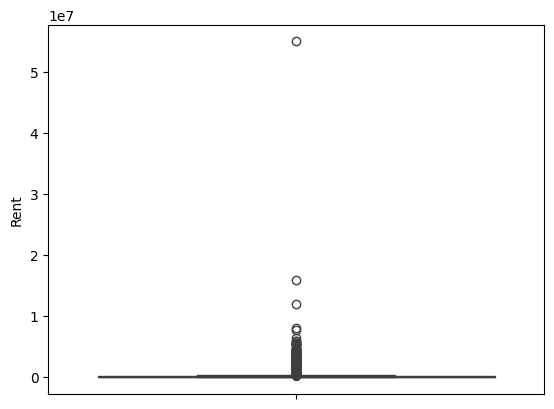

In [121]:
import seaborn as sns
sns.boxplot(data=data['Rent'])

In [122]:
data.columns

Index(['Rent', 'Beds', 'Baths', 'Area_in_sqft', 'Rent_category',
       'Age_of_listing_in_days', 'Latitude', 'Longitude',
       'Furnishing_Furnished', 'Furnishing_Unfurnished', 'City_Abu Dhabi',
       'City_Ajman', 'City_Al Ain', 'City_Dubai', 'City_Fujairah',
       'City_Ras Al Khaimah', 'City_Sharjah', 'City_Umm Al Quwain',
       'Type_Apartment', 'Type_Hotel Apartment', 'Type_Penthouse',
       'Type_Residential Building', 'Type_Residential Floor',
       'Type_Residential Plot', 'Type_Townhouse', 'Type_Villa',
       'Type_Villa Compound'],
      dtype='object')

<Axes: >

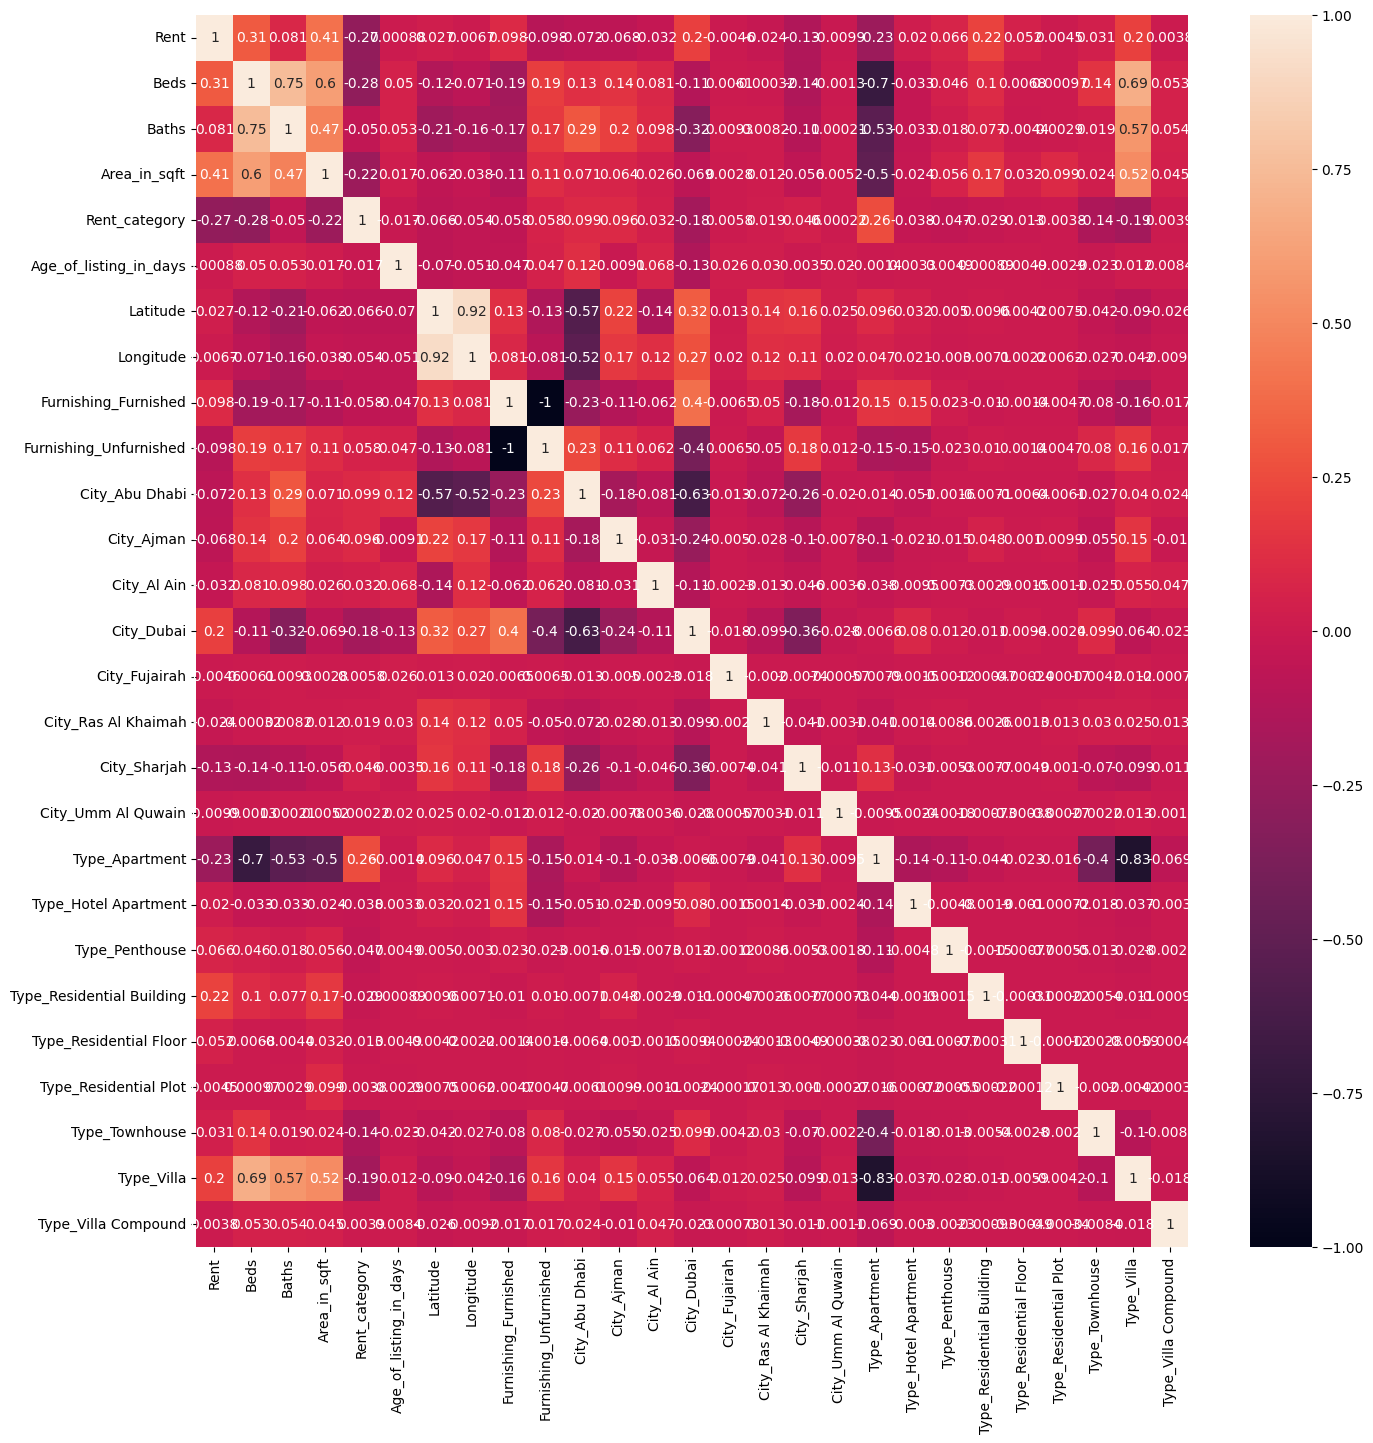

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
sns.heatmap(data=data.corr(),annot=True)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rent                       73742 non-null  int64  
 1   Beds                       73742 non-null  int64  
 2   Baths                      73742 non-null  int64  
 3   Area_in_sqft               73742 non-null  int64  
 4   Rent_category              73742 non-null  int32  
 5   Age_of_listing_in_days     73742 non-null  int64  
 6   Latitude                   73742 non-null  float64
 7   Longitude                  73742 non-null  float64
 8   Furnishing_Furnished       73742 non-null  int32  
 9   Furnishing_Unfurnished     73742 non-null  int32  
 10  City_Abu Dhabi             73742 non-null  int32  
 11  City_Ajman                 73742 non-null  int32  
 12  City_Al Ain                73742 non-null  int32  
 13  City_Dubai                 73742 non-null  int

In [125]:
value=[ 'Beds', 'Baths', 'Area_in_sqft', 'Rent_category',
       'Age_of_listing_in_days', 'Latitude', 'Longitude',
       'Furnishing_Furnished', 'Furnishing_Unfurnished', 'City_Abu Dhabi',
       'City_Ajman', 'City_Al Ain', 'City_Dubai', 'City_Fujairah',
       'City_Ras Al Khaimah', 'City_Sharjah', 'City_Umm Al Quwain',
       'Type_Apartment', 'Type_Hotel Apartment', 'Type_Penthouse',
       'Type_Residential Building', 'Type_Residential Floor',
       'Type_Residential Plot', 'Type_Townhouse', 'Type_Villa',
       'Type_Villa Compound']
target='Rent'
X=data[value] 
y=data[target]

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=16)

In [127]:
from sklearn.linear_model import LinearRegression
from cmath import sqrt
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
mse=mean_squared_error(y_test,y_predict)
rmse=sqrt(mse)
rmse



(163674.020193181+0j)